Task 5 - Sales Prediction using python

Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Load CSV file into pandas data frame

In [2]:
df = pd.read_csv('/content/Advertising.csv')

Data Analysis

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape 

(200, 5)

In [4]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Data Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

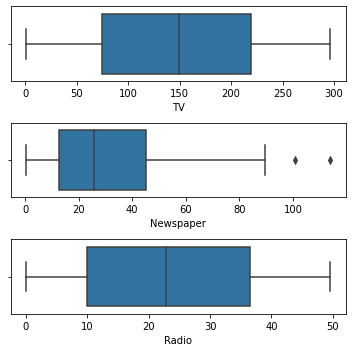

In [9]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

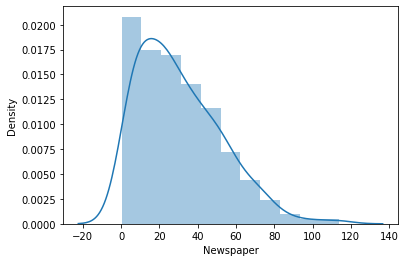

In [10]:
sns.distplot(df['Newspaper'])

In [11]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [12]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [13]:
data = df.copy()

In [14]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot:xlabel='Newspaper'>

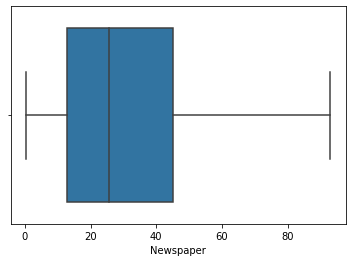

In [15]:
sns.boxplot(data['Newspaper'])

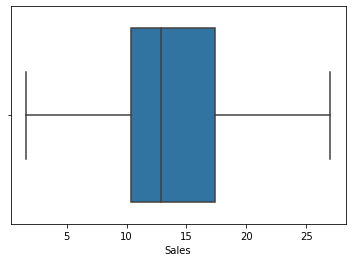

In [16]:
sns.boxplot(data['Sales']);

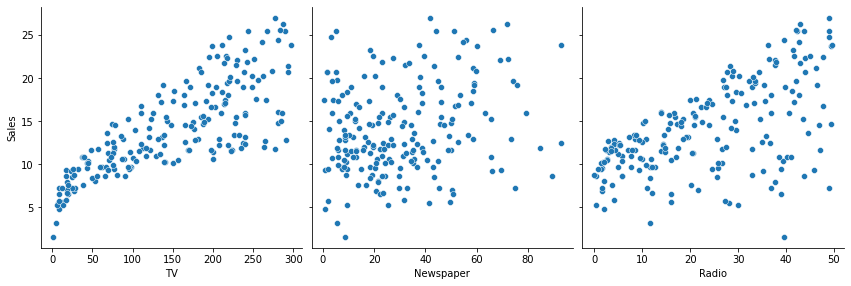

In [17]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

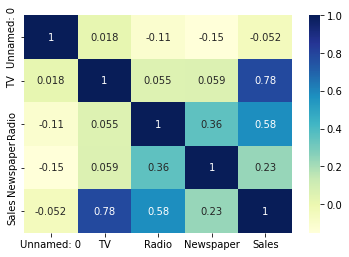

In [20]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [18]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [19]:
print(important_features)

['TV', 'Radio', 'Sales']


In [21]:
X = data['TV']
y = data['Sales']

In [23]:
X = X.values.reshape(-1,1)

Splitting training and testing data

In [24]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [25]:
print(X.shape,y.shape)

(200, 1) (200,)


Model Training 

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.33)

In [27]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [28]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor


In [29]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [30]:
knn_train_pred = knn.predict(X_train)

In [31]:
knn_test_pred = knn.predict(X_test)

In [32]:
print(knn_train_pred, knn_test_pred)

[13.66  9.84 12.16 17.96 18.44  7.78 21.6  12.74  9.96 17.64  8.64 13.66
 14.82 12.1  12.44 14.82 20.2  20.56 13.74 16.52 11.44  9.44 18.44 17.02
 13.66 16.14 16.52 18.74 16.44 11.3   8.64 16.52 19.94 17.02 15.16 13.8
 21.66 12.84  7.78 19.46  7.78 16.44 16.34  8.18 10.04  9.98 10.86 14.68
 19.12 12.96 16.64 20.36 15.46  8.64 10.26 20.38 18.78 12.44 11.54 12.16
 21.4   9.98 20.96 10.04 17.02 10.26 10.04 15.62  9.84  7.78  6.9  19.08
  6.22  5.42 12.2  15.46  6.22 11.3  13.76 13.76 11.3  11.3  12.44  5.42
  8.64 13.58 15.98 18.78 11.1  19.66 21.4  13.76 16.88 21.6  15.9  20.62
 19.12 11.3  10.04 19.36  8.2  13.66 11.1  17.64 16.58  7.62 19.66 18.74
 11.54 19.94  8.2  16.88 15.98 17.02 20.96 16.64 18.78  7.78 15.9  16.14
 16.16 12.1  13.46 13.24 17.68 19.36 19.12 15.46 10.36 20.8  10.04 10.18
 13.84 11.1 ] [17.42 13.74 17.64 12.44 13.94 18.78 10.38 11.54 11.54 19.08 11.3  13.76
 17.64 20.2  20.1  17.02 13.66 19.12  8.66 12.84 13.46 18.28 13.66 15.46
 17.78 20.8  11.54 18.74  5.42 12.04 1

In [33]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [34]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.4630633578425355
RMSE: 3.647689181336091


In [35]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.657723,0.463063,3.647689,0.194659


In [36]:
import statsmodels.api as sm

In [37]:
X_train_constant = sm.add_constant(X_train)

In [38]:
model = sm.OLS(y_train, X_train_constant).fit()

In [39]:
model.params

const    6.960569
x1       0.049896
dtype: float64

In [40]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     229.9
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.06e-30
Time:                        17:57:06   Log-Likelihood:                -346.05
No. Observations:                 134   AIC:                             696.1
Df Residuals:                     132   BIC:                             701.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9606      0.554     12.559      0.0

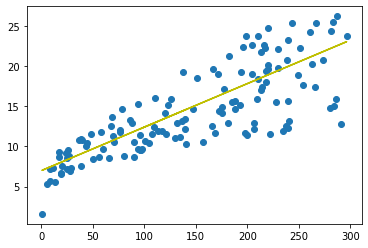

In [41]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [42]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

145   -3.661034
135    2.229435
88     1.533579
147    6.304627
141    2.574498
         ...   
20     0.142057
190    1.868523
13    -2.125468
57    -0.556459
34    -2.235655
Name: Sales, Length: 134, dtype: float64

In [43]:
y_train_pred

array([13.96103393,  9.37056529, 11.36642122, 19.09537331, 16.6255016 ,
        7.92855938, 20.21305263, 12.59387262,  9.11110402, 16.92986963,
        8.20797921, 13.84128258, 15.56769796, 10.9622604 , 12.43919378,
       15.50782228, 17.67332596, 20.61721346, 13.66165554, 17.27914442,
       11.47120366,  9.82961216, 16.71032548, 18.94069448, 13.91113753,
       18.41179266, 17.1893309 , 21.46545223, 16.33610249, 10.25872118,
        8.14810353, 17.28413406, 17.7781084 , 18.9307152 , 14.77434522,
       14.31030872, 19.47957558, 13.53192491,  7.8936319 , 19.37479314,
        7.81878731, 16.33111285, 18.4417305 ,  8.29779273,  8.80174635,
       11.76060277, 11.23669059, 15.79223175, 21.00141573, 12.80842713,
       17.41885433, 17.92779759, 15.22341281,  8.23791705,  9.18095898,
       17.82301516, 18.05752823, 12.48410054, 10.76766444, 11.43627618,
       21.23093916, 11.81049917, 19.99849812,  9.76474684, 18.92572556,
        9.93439459,  8.85663239, 17.14442414,  9.45538917,  7.93

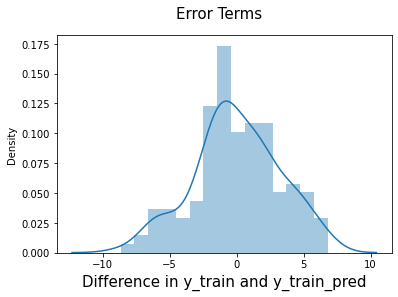

In [44]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

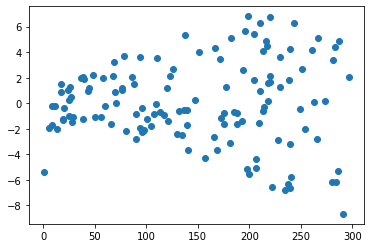

In [45]:
plt.scatter(X_train, res)
plt.show()

In [46]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [47]:
y_pred

array([16.49577096, 13.7065623 , 16.92986963, 12.43919378, 14.09076457,
       18.05752823, 12.08492936, 10.72774732, 10.70778876, 21.41555583,
       10.40342074, 12.95811633, 16.89494215, 17.70825344, 20.76690266,
       18.94069448, 14.01093033, 20.96648825,  8.5323058 , 13.50198707,
       14.43504972, 18.13736247, 13.92111681, 15.45293624, 18.22717598,
       17.86293228, 10.68783021, 21.61015179,  7.16514449, 10.62296489,
       19.35483458, 21.57522431, 18.54152329, 15.16852677, 20.19309408,
       20.77688194,  7.81878731,  7.38967828, 10.06911487, 11.31153518,
       12.74855145, 18.29703094,  9.63002656, 15.79223175, 18.33694806,
       18.8059742 , 15.11863037,  9.19093826,  7.85371478, 17.0645899 ,
        7.89862154, 19.70410937, 16.36105069, 20.07833236, 16.82009755,
       19.02052872, 14.43006008,  7.61421207,  9.10611438,  7.34976116,
       15.10865109, 10.71776804,  7.32481296, 10.77265408, 16.18641329,
       10.2986383 ])

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [49]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.376964554298971

In [50]:
r2 = r2_score(y_test, y_pred)
r2

0.5398065885352776

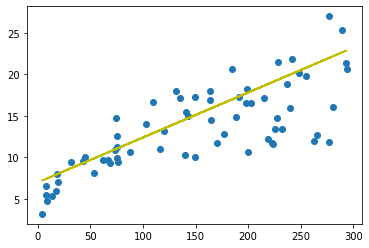

In [51]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()